In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns #Another library for visualization
np.set_printoptions(suppress=True)
sns.set_style("ticks") #to see seaborn inline in notebook
%matplotlib inline  #to see matplotlib inline in notebook
plt.style.use("seaborn-poster")  # make bigger plots

UsageError: unrecognized arguments: #to see matplotlib inline in notebook


In [3]:
df = pd.read_excel('dataset1 for day 1.xlsx', sheet_name='Sheet1')
df

,Id,Products,Headcount,Patents,Sales,Profit
0,1,68,364,10,54605.399761,5690738
1,2,57,634,21,64701.168895,4112148
2,3,26,652,24,54945.035816,1036437
3,4,82,653,10,64898.296873,8235277
4,5,62,974,22,75955.735624,4860654
5,6,19,67,19,63908.471015,631546
6,7,11,586,23,94974.532944,437864
7,8,11,588,14,92415.102564,378062
8,9,77,288,11,91769.759560,7334319
9,10,42,682,25,66729.264683,2377150


In [52]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Train of x: ",x_train.shape) # x is always 2d so that (40,1)
print("Train of y:",y_train.shape) # y is always 1d so that (40,)
print("Test of x:",x_test.shape)
print('Test of y:',y_test.shape)

Train of x:  (400, 4)
Train of y: (400,)
Test of x: (100, 4)
Test of y: (100,)


In [54]:
from sklearn.linear_model import LinearRegression
def model(x_temp_train,x_temp_test,degree,col):
    regressor=LinearRegression() 
    regressor.fit(x_temp_train,y_train)
    print("Degree:",degree," column:",col)
    print("Score for Train...",regressor.score(x_temp_train,y_train))
    print("Score for Test...",regressor.score(x_temp_test,y_test))
    
for i in range(x_train.shape[1]):
    # Linear regression
    model(x_train[:,i:i+1],x_test[:,i:i+1],1,i)
    
    # Square
    model(x_train[:,i:i+1]**2,x_test[:,i:i+1]**2,2,i)
    
    # Cube
    model(x_train[:,i:i+1]**3,x_test[:,i:i+1]**3,3,i)
    
    print()

Degree: 1  column: 0
Score for Train... 0.9325102362206981
Score for Test... 0.9328289037811383
Degree: 2  column: 0
Score for Train... 0.9998890135009613
Score for Test... 0.9998517105024801
Degree: 3  column: 0
Score for Train... 0.9705879786108216
Score for Test... 0.9683236055194531

Degree: 1  column: 1
Score for Train... 0.0014217882552758354
Score for Test... 0.0070435467992117085
Degree: 2  column: 1
Score for Train... 0.0021332549533987777
Score for Test... 0.006462493985550322
Degree: 3  column: 1
Score for Train... 0.0024792700079803165
Score for Test... 0.004820590560640325

Degree: 1  column: 2
Score for Train... 0.031106305232768583
Score for Test... -0.06086569516380136
Degree: 2  column: 2
Score for Train... 0.029736767640221373
Score for Test... -0.06194915547059843
Degree: 3  column: 2
Score for Train... 0.02792256198969256
Score for Test... -0.06150121588509627

Degree: 1  column: 3
Score for Train... 0.0029815058773152714
Score for Test... -0.016807988393592987
Degr

Score for Train... 0.9998890135009613
Score for Test... 0.9998517105024801
Slope: [1197.92632722]
Intercept: 229445.89578486746


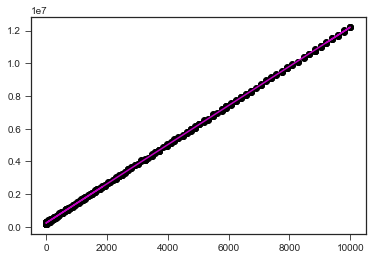

In [56]:
# Final Model
regressor=LinearRegression() 
regressor.fit(x_train[:,0:1]**2,y_train)
print("Score for Train...",regressor.score(x_train[:,0:1]**2,y_train))
print("Score for Test...",regressor.score(x_test[:,0:1]**2,y_test))
print("Slope:",regressor.coef_)
print("Intercept:",regressor.intercept_)
# Training data with Regression Line (SLR)
plt.scatter(x_train[:,0:1]**2,y_train,c='k')
plt.plot(x_train[:,0:1]**2,regressor.predict(x_train[:,0:1]**2),c="m")

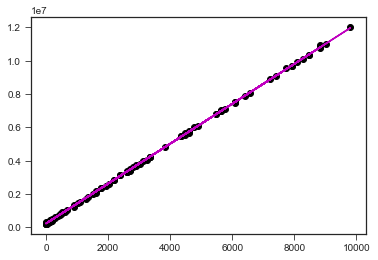

In [57]:
# Testing data with Regression Line (SLR)
plt.scatter(x_test[:,0:1]**2,y_test,c='k')
plt.plot(x_test[:,0:1]**2,regressor.predict(x_test[:,0:1]**2),c="m")